In [8]:
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd




# 준비된 수술 환자 데이터를 불러옴, class가 1이면 당뇨
# 용어 해석 : diabetes : 당뇨, plasma : 포도당 부하 검사 후 2시간 후 공복 혈당 농도(mm Hg)
# pregnant : 과거 임신 횟수, pressure : 확장기 혈압(mm Hg), 
# thickness : 심두근 피부 주름 두께(mm), BMI : 체질량 지수, pedigree : 당뇨병 가족력 
df = pd.read_csv("pima-indians-diabetes.csv", 
                       names = ["pregnant", "plasma", "pressure", "thickness",
                                "insulin", "BMI", "pedigree", "age", "class"])

print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [9]:
print(df.info())
print(" ")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
 
         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000

In [5]:
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [10]:
# pregnant 컬럼으로 group by하고, as_index=False로 새로운 인덱스를 생성한다.
# mean으로 평균을 구한 후, 오름차순으로 정렬한다.
# 목적 : 임신 횟수와 당뇨병 발병 확률을 구할 수 있다.
new_df = df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True)
print(new_df)


    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


0.04315032084767642 0.1759717871470992


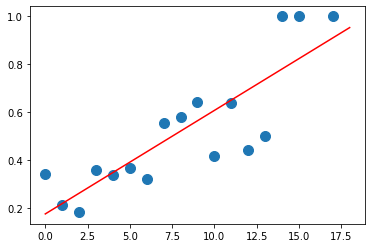

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

m, b = np.polyfit(new_df['pregnant'], new_df['class'], deg = 1)
print(m, b)

plt.scatter(new_df['pregnant'], new_df['class'], s=100)
plt.plot(np.arange(0, 19), m * np.arange(0, 19) + b, c = 'red')
plt.show()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


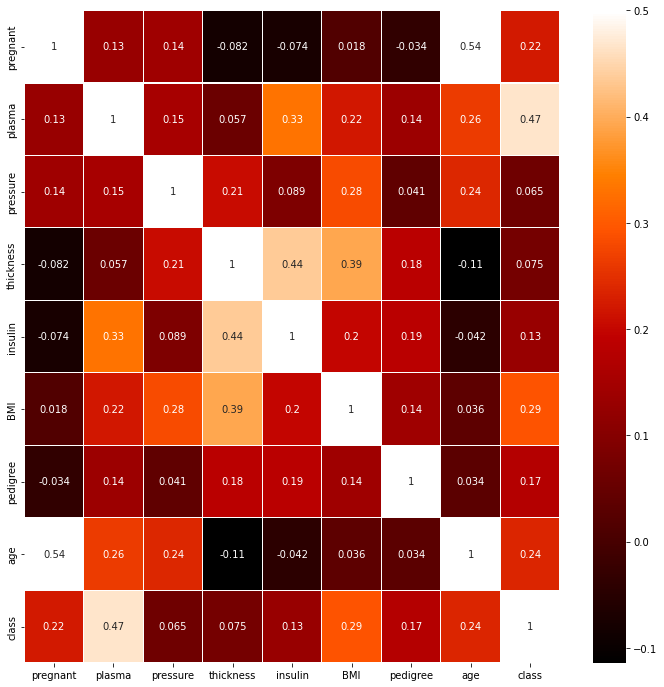

In [14]:
# 분석을 위해 A와 B의 관계를 나타내는 콜레이션 매트릭스를 출력해본다.
# 1에 가까우면 양의 상관성, -1에 가까우면 음의 상관성이 있다고 한다.
display(df.corr())

# 히트맵으로 확인해본다.
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat,
            linecolor='white', annot=True)
plt.show()

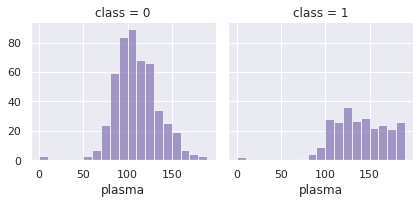

In [21]:
sns.set(color_codes = True)
bins = range(0, 200, 10) # 눈금선 
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=bins, color='m', alpha=0.7)# m은 마젠타 색을 의미
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import random

np.random.seed(3)
tf.random.set_seed(3)

In [22]:
# dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# X = dataset[:, 0:8]
# Y = dataset[:, 8]

X = df.iloc[:, 0:8].to_numpy()
Y = df.iloc[:, 8].to_numpy()

print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [27]:

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

# Param 수 계산
# 8 * 12 + bias 12 건 = 108건
# 12 * 8 + bias 8 건 = 104건
# 8 * 1 + bias 1건 = 9건
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  dense_3 (Dense)             (None, 12)                108       
                                                                 
#  dense_4 (Dense)             (None, 8)                 104       
                                                                 
#  dense_5 (Dense)             (None, 1)                 9   

#모델 컴파일
 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=20, batch_size=10)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
77/77 [==============================] - 1s 4ms/step - loss: 7.4953 - accuracy: 0.6081
Epoch 2/20
77/77 [==============================] - 0s 3ms/step - loss: 2.7489 - accuracy: 0.5052
Epoch 3/20
77/77 [==============================] - 0s 2ms/step - loss: 1.2092 - accuracy: 0.4648
Epoch 4/20
77/77 [===

In [28]:
print("/\ Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

24/24 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.7122
/\ Accuracy: 0.7122


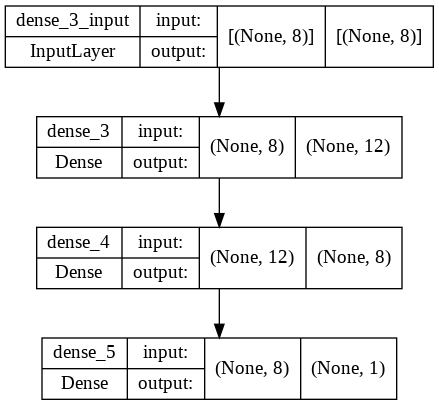

In [47]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [51]:
!tensorboard dev upload --logdir ./logs \
  --name "Simple experiment with MNIST" \
  --description "Training results from https://colab.sandbox.google.com/github/tensorflow/tensorboard/blob/master/docs/tbdev_getting_started.ipynb" \
  --one_shot

2022-04-18 02:59:04.604233: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/0gbJNlW3RmqhbMUQyQwyZQ/

[2022-04-18T02:59:04] Started scanning logdir.
[2022-04-18T02:59:04] Done scanning logdir.
TensorBoard was run in `one_shot` mode, but did not find any uploadable data in the specified logdir: ./logs
An empty experiment was created. To delete the empty experiment you can execute the following

    tensorboard dev delete --experiment_id=0gbJNlW3RmqhbMUQyQwyZQ


Done.


In [52]:
!tensorboard dev list

2022-04-18 02:59:19.064755: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
https://tensorboard.dev/experiment/0gbJNlW3RmqhbMUQyQwyZQ/
	Name                 Simple experiment with MNIST
	Description          Training results from https://colab.sandbox.google.com/github/tensorflow/tensorboard/blob/master/docs/tbdev_getting_started.ipynb
	Id                   0gbJNlW3RmqhbMUQyQwyZQ
	Created              2022-04-18 02:59:04 (23 seconds ago)
	Updated              2022-04-18 02:59:04 (23 seconds ago)
	Runs                 0
	Tags                 0
	Scalars              0
	Tensor bytes         0
	Binary object bytes  0
Total: 1 experiment(s)


In [54]:
import datetime
from tensorboard.plugins.hparams import api as hp

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

#모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 텐서보드 사용할 때 셋팅
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)
hparams_callback = hp.KerasCallback(log_dir, {
    'num_relu_units': 512,
    'dropout': 0.2
})

# 모델 실행
model.fit(X, Y, epochs=20, batch_size=10,
          callbacks=[tensorboard_callback, hparams_callback])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                108       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
77/77 [==============================] - 2s 15ms/step - loss: 6.6140 - accuracy: 0.6068
Epoch 2/20
77/77 [==============================] - 1s 9ms/step - loss: 1.1595 - accuracy: 0.5078
Epoch 3/20
77/77 [==============================] - 0s 3ms/step - loss: 0.9548 - accuracy: 0.5352
Epoch 4/20
77/77 [==

In [55]:
!tensorboard dev upload --logdir ./logs \
  --name "Simple experiment with MNIST" \
  --description "Training results from https://colab.sandbox.google.com/github/tensorflow/tensorboard/blob/master/docs/tbdev_getting_started.ipynb" \
  --one_shot

2022-04-18 03:04:48.552671: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/Smck7JWdQ9S6RRr6lBFK2w/

[2022-04-18T03:04:49] Started scanning logdir.
[2022-04-18T03:04:49] Total uploaded: 40 scalars, 122 tensors (86.1 kB), 1 binary objects (42.9 kB)
[2022-04-18T03:04:49] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/Smck7JWdQ9S6RRr6lBFK2w/
